### Econ problem set 3
#### By Cooper Nederhood

In [49]:
import numpy as np

In [50]:
def feasible(f_params, bvec_guess):
    b_cnstr = np.array([False,False])
    nvec, A, alpha, delta = f_params

    K = np.sum(bvec_guess)
    K_cnstr = np.sum(bvec_guess)<=0

    L = np.sum(nvec)
    r = alpha * A * ( (L/K) ** (1-alpha) ) -delta

    w = (1-alpha) * A * ( (K/L) ** alpha)

    c_vec, c_cnstr = init_cvec(r,w,bvec_guess,nvec)

    if c_cnstr[0]:
        b_cnstr[0]=True
    if c_cnstr[1]:
        b_cnstr[0]=True
        b_cnstr[1]=True
    if c_cnstr[2]:
        b_cnstr[1]=True

    return b_cnstr, c_cnstr, K_cnstr

In [51]:
def init_cvec(r, w, bvec, nvec):
    '''
    Small helper function to create cvec and c_cnstr
    '''

    b = np.append([0], bvec)
    b1 = np.append(bvec, [0])
    c_vec = (1 + r) * b + w * nvec - b1
    c_cnstr = c_vec <= 0

    return c_vec, c_cnstr

#### Problem 1:

In [52]:
beta_annual = 0.96
beta = beta_annual**20
sigma = 3
nvec = np.array([1.0,1.0,0.2])
L = nvec.sum()

#Firm parameters
A = 1.0
alpha = 0.35
delta_annual = 0.05
delta = 1-((1-delta_annual)**20)

bvec_a = np.array([1.0, 1.2])
bvec_b = np.array([.6, -0.001])
bvec_c = np.array([.1, .1])

f_params = (nvec,A,alpha,delta)

results_a = np.array(feasible(f_params, bvec_a))
results_b = np.array(feasible(f_params, bvec_b))
results_c = np.array(feasible(f_params, bvec_c))

In [53]:
print("Part a:")
print("Given bvec_guess of", bvec_a)
print("\tyields result:\n", results_a)
print()

Part a:
Given bvec_guess of [1.  1.2]
	yields result:
 [array([ True, False]) array([ True, False, False]) False]



In [54]:
print("Part b:")
print("Given bvec_guess of", bvec_b)
print("\tyields result:\n", results_b)
print()

Part b:
Given bvec_guess of [ 0.6   -0.001]
	yields result:
 [array([ True, False]) array([ True, False, False]) False]



In [55]:
print("Part c:")
print("Given bvec_guess of", bvec_c)
print("\tyields result:\n", results_c)
print()

Part c:
Given bvec_guess of [0.1 0.1]
	yields result:
 [array([False, False]) array([False, False, False]) False]



#### Problem 2:

In [56]:
import time
import scipy.optimize as opt
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [57]:
def get_w(K, w_args):
    '''
    Small helper function to calculate w given inputs
    '''
    
    A, alpha, L = w_args
    
    w = (1 - alpha) * A * (((K) / (L)) ** alpha)
    
    return w

def get_r(K, r_args):
    '''
    Small helper function to calculate r given inputs
    '''
    A, alpha, delta, L = r_args
    
    r = alpha * A * ((L / (K)) ** (1 - alpha)) - delta
    
    return r

In [58]:
def get_SS(params, bvec_guess, SS_graphs):
    '''
    Per question 2, analyze the steady state savings and consumption decisions
    '''
    start_time = time.clock()
    
    beta, sigma, nvec, A, alpha, delta, SS_tol = params
    b2, b3 = bvec_guess
    
    L = np.sum(nvec)
    err_args = beta, sigma, A, alpha, delta, L
    w_args = A, alpha, L
    r_args = A, alpha, delta, L
    
    results_ss = opt.root(Eul_errs, bvec_guess, tol=SS_tol, args=(err_args))
    
    b_ss = results_ss.x
    w_ss = get_w(np.sum(b_ss), w_args)
    r_ss = get_r(np.sum(b_ss), r_args)
    c_ss = np.array([w_ss - b_ss[0], w_ss + (1 + r_ss)*b_ss[0] - b_ss[1], (1 + r_ss)*b_ss[1] + .2 * w_ss])
    K_ss = np.sum(b_ss)
    Y_ss = A * (K_ss ** alpha) * (L ** (1 - alpha))
    C_ss = Y_ss - K_ss + (1 - delta) * K_ss
    
    EulErr_ss = np.array([beta * (1 + r_ss) * (c_ss[1] ** -sigma) - (c_ss[0] ** -sigma),
                          beta * (1 + r_ss) * (c_ss[2] ** -sigma) - (c_ss[1] ** -sigma)])
    RCerr_ss = Y_ss - C_ss - delta * K_ss
    
    ss_time = time.clock()
    
    ss_output = {'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss, 'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss, 
        'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss, 
        'ss_time': ss_time}
     
    if SS_graphs == True:
        s = np.array([1,2,3])
        plt.plot(s, ss_output['c_ss'])
        plt.xlabel('Age')
        plt.ylabel('Consump.')
        plt.title('SS Consumption')
        plt.show()

        plt.plot(s[1:], ss_output['b_ss'])
        plt.xlabel('Age')
        plt.ylabel('Saving')
        plt.title('SS Saving')
        plt.show()
        
    return ss_output

In [59]:
def Eul_errs(bvec, *err_args):

    beta, sigma, A, alpha, delta, L = err_args
    b2, b3 = bvec
    
    w_args = A, alpha, L
    r_args = A, alpha, delta, L
    w = get_w(b2 + b3, w_args) 
    r = get_r(b2 + b3, r_args) 
    
    c1 = w - b2
    c2 = w + (1 + r) * b2 - b3
    c3 = (1 + r) * b3 + 0.2 * w
    
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    MU3 = c3 ** (-sigma)
    
    err1 = MU1 - beta * (1 + r) * MU2
    err2 = MU2 - beta * (1 + r) * MU3
    
    return err1, err2

In [60]:
SS_tol = 0.000001
params = ((beta, sigma, nvec, A, alpha, delta, SS_tol))
bvec_guess = np.array([.1, .1])

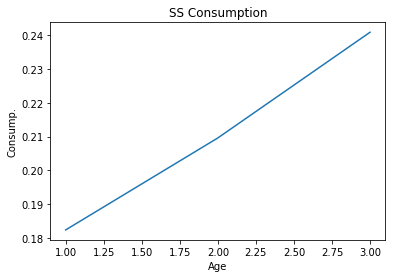

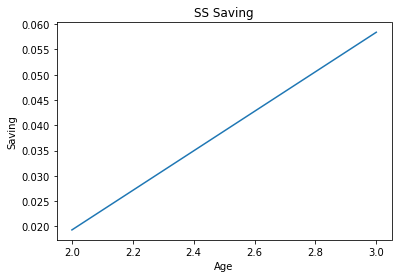

{'b_ss': array([0.01931274, 0.05841159]), 'c_ss': array([0.18241256, 0.20961491, 0.24087382]), 'w_ss': 0.20172529359537983, 'r_ss': 2.4330302535700885, 'K_ss': 0.07772432611790048, 'Y_ss': 0.6827625321689779, 'C_ss': 0.6329012827930353, 'EulErr_ss': array([-4.58641125e-10,  8.88931595e-10]), 'RCerr_ss': 6.938893903907228e-18, 'ss_time': 6.200648}


In [61]:
ss_output = get_SS(params, bvec_guess, SS_graphs=True)
print(ss_output)

Per the output above, it took about 3 seconds for calculations

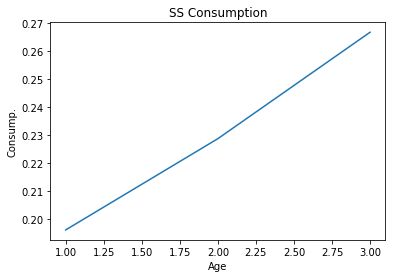

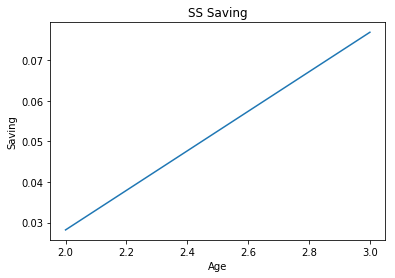

{'C_ss': 0.691283104418148,
 'EulErr_ss': array([6.82537689e-08, 2.50616949e-08]),
 'K_ss': 0.10504252544893955,
 'RCerr_ss': 0.0,
 'Y_ss': 0.7586693632394017,
 'b_ss': array([0.02817696, 0.07686557]),
 'c_ss': array([0.19597535, 0.22861559, 0.26669216]),
 'r_ss': 1.886360000063548,
 'ss_time': 6.476579,
 'w_ss': 0.22415231186618687}

In [62]:
# Problem 2.c
beta1 = .55
params1 = beta1, sigma, nvec, A, alpha, delta, SS_tol
results_ss = get_SS(params1, bvec_guess, SS_graphs=True)
results_ss

As the beta increases individuals are discounting the future less and thus they become more patient. Accordingly, savings increases. Initially, I had thought this would decrease consumption but total consumption also increases as the increased savings leads to more production. Wages also increase. Only the interest rate decreases, which makes sense, given that increases in the supply of savings causes decreases in borrowing costs.

#### Problem 3:

In [63]:
import scipy.linalg as la

In [64]:
def get_b32(b32, *err_args):

    beta, sigma, rpath, wpath, nvec, b21 = err1_args
    
    # Calculate consumption
    c1 = wpath[0] * nvec[1] + (1 + rpath[0]) * b21 - b32
    c2 = (1 + rpath[1]) * b32 + nvec[2] * wpath[1]
    
    # Calculate marginal utility
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    
    # Calculate error 
    err = MU1 - beta * (1 + rpath[1]) * MU2
    
    return err

def get_b2t_b3t1(bvec, *err2_args):
    
    beta, sigma, rpath, wpath, nvec = err2_args 
    
    # Calculate consumption 
    c1 = nvec[0] * wpath[0] - bvec[0]
    c2 = nvec[1] * wpath[1] + (1 + rpath[0]) * bvec[0] - bvec[1]
    c3 = (1 + rpath[1]) * bvec[1] + nvec[2] * wpath[2]
    
    # Calculate marginal utility
    MU1 = c1 ** (-sigma)
    MU2 = c2 ** (-sigma)
    MU3 = c3 ** (-sigma)
    
    # Calculate error
    err1 = MU1 - beta * (1 + rpath[0]) * MU2
    err2 = MU2 - beta * (1 + rpath[1]) * MU3
    
    return err1, err2


In [65]:
# Set parameters
beta_annual = 0.96
beta = beta_annual ** 20 # economic lifetime is 60 years, 3 periods
sigma = 2.2
n_vec = np.array([1.0, 1.0, 0.2])
L = sum(n_vec)
alpha = 0.35
A = 1.0
delta_annual = 0.05
delta = 1 - (1 - delta_annual) ** 20

T = 50
path_toler = 1e-9
xi = 0.2
maxIter = 1000

params = beta, sigma, nvec, A, alpha, delta, path_toler

In [66]:


# Solve for the steady-state
results_ss = get_SS(params, bvec_guess, False)
b2bar, b3bar = results_ss['b_ss']

# Set initial condition
b21 = 0.8 * b2bar
b31 = 1.1 * b3bar

# Initial guess for K
K1 = b21 + b31
Kbar = b2bar + b3bar
Kpath = np.linspace(K1, Kbar, T)
# Add to make the same size
Kpath = np.append(Kpath, Kbar)
w_args = A, alpha, L
r_args = A, alpha, delta, L
rpath = get_r(Kpath, r_args)
wpath = get_w(Kpath, w_args)

# Add to make the same size.
rbar = get_r(Kbar, r_args)
wbar = get_w(Kbar, w_args)
rpath = np.append(rpath, rbar)
wpath = np.append(wpath, wbar)



In [67]:
eps = path_toler + 1
iteration = 1
bvec_guess = np.array([.1, .1])

while (iteration < maxIter) and (eps > path_toler):
    bmat = np.zeros((T+1,2))
    bmat[0,0] = b21
    bmat[0,1] = b31
    
    err1_args = beta, sigma, rpath[:2], wpath[:2], nvec, b21
    result1 = opt.root(get_b32, bmat[0,1], args=(err1_args))
    bmat[1,1] = result1.x
    EulErrs = np.zeros((T+1, 2))
    EulErrs[1,1] = result1.fun
    
    for t in range(1,T):
        err2_args = beta, sigma, rpath[t:t+2], wpath[t-1:t+2], nvec
        result2 = opt.root(get_b2t_b3t1, bvec_guess, args=(err2_args))
        bmat[t,0] = result2.x[0]
        bmat[t+1,1] = result2.x[1]
        EulErrs[t,0] = result2.fun[0]
        EulErrs[t+1,1] = result2.fun[1]

    max_EulErrs = np.abs(EulErrs).max(axis = 0)
    
    Kpath_prime = bmat[:-1].sum(axis=1)
    Kpath_prime = np.append(Kpath_prime, Kbar)
    eps = la.norm(Kpath_prime - Kpath, 2)
    Kpath_new = xi * Kpath_prime + (1 - xi) * Kpath
    Kpath = np.copy(Kpath_new)
    
    rpath = get_r(Kpath, r_args)
    wpath = get_w(Kpath, w_args)
    
    iteration = iteration + 1



In [68]:
print("Maximum of the absolute values of all the Euler errors across the entire time path: ", max_EulErrs)
Y_t = A * (Kpath[:-1] ** alpha) * (2.2 **(1 - alpha))
C_t = 2.2 * wpath[:-1] + (1 + rpath[:-1]) * bmat[:-1,0] - bmat[1:,0] + (1 + rpath[:-1]) * bmat[:-1,1] - bmat[1:,1]
RC_Err = Y_t - C_t - Kpath[1:] + (1 - delta) * Kpath[:-1]
max_RC_Err = np.abs(RC_Err).max()
print("Maximum of the absolute value of all the aggregate resource \n\
    constraint errors Yt − Ct − Kt+1 + (1 − δ)Kt across the entire time path:", max_RC_Err)


Maximum of the absolute values of all the Euler errors across the entire time path:  [1.63495883e-11 3.09750448e-10]
Maximum of the absolute value of all the aggregate resource 
    constraint errors Yt − Ct − Kt+1 + (1 − δ)Kt across the entire time path: 0.023719803220468412
